PROGETTO DI ESAME PER LABORATORIO DI BIG DATA, DATA MINING E DATA ANALYTICS

Questo progetto si prefigge di rappresentare i consumi totali in kWh (kiloWatt ora) della macchina del caffè situata nei laboratori del' azienda ALEXIDE Cesena con una heatmap che abbia sull'asse x le ore del giorno e sull'asse y il giorno della settimana.

A SEGUIRE IL TESTO DELLA CONSEGNA PROPOSTA DAL PROF, DEGLI OBIETTIVI DEL PROGETTO

Il file 'Data.csv' contiene i dati relativi al consumo di energia elettrica della macchina del caffè di Alexide.

La colonna "Date" rappresenta data e ora della registrazione del sensore. Si noti che le date sono espresse in UTC. Per convertirle nella timezone locale utilizzare

df['Date'] = pd.to_datetime(df['Date'], utc = True).dt.tz_convert('Europe/Berlin')

La colonna "Energy" rappresenta il consumo di energia totale, espressa in W per min (Watt minuto), a partire dall'accensione del sensore. Si noti che il sensore è stato riavviato diverse volte nel periodo di osservazione e, a seguito di ciascun riavvio, il conteggio è ripartito da 0.

La colonna "Topic" rappresenta il topic del messaggio mqtt ricevuto dal sensore.

OBIETTIVO FINALE

1) Rappresentare i consumi totali in kWh (kiloWatt/ora) con una heatmap che abbia sull'asse x le ore del giorno e sull'asse y il giorno della settimana.

Importo le librerie con le quali abbiamo lavorato

In [22]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Carico il file "data" con all'interno 3 Colonne di dati, la prima relativa al consumo energetico la seconda relativa al campo data con ora la terza il messaggio topic del messaggio MQTT 
Lo importiamo nel nostro Data Frame impostando come separatore il ";" dal file CSV

In [23]:
df = pd.read_csv('data.csv', sep=';')

visualizzo il DF che ho caricato

In [24]:
df

,Energy,Date,Topic
0,31678,2022-10-04 07:44:00+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
1,31680,2022-10-04 07:45:02+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
2,31688,2022-10-04 07:46:04+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
3,31692,2022-10-04 07:47:21+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
4,31694,2022-10-04 07:48:15+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
...,...,...,...
54789,129200,2022-07-31 22:29:21+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54790,129200,2022-07-31 22:24:20+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54791,129200,2022-07-31 22:19:21+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54792,129200,2022-07-31 22:14:21+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy


visualizzo le relative informazioni su colonne, i tipi di dati ed eventuali valori nulli

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54794 entries, 0 to 54793
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Energy  54794 non-null  int64 
 1   Date    54794 non-null  object
 2   Topic   54794 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


Converto la colonna "Date" in formato "Datatime" per comodita e setto la colonna allineandola al fuso orario giusto

In [26]:
df['Date'] = pd.to_datetime(df['Date'], utc = True).dt.tz_convert('Europe/Berlin')

Controllo che l'impostazione della data sia avvenuta

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54794 entries, 0 to 54793
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype                        
---  ------  --------------  -----                        
 0   Energy  54794 non-null  int64                        
 1   Date    54794 non-null  datetime64[ns, Europe/Berlin]
 2   Topic   54794 non-null  object                       
dtypes: datetime64[ns, Europe/Berlin](1), int64(1), object(1)
memory usage: 1.3+ MB


Ordino le colonne per data in sequenza temporale per lavorare meglio nel dataset

In [28]:
df = df.sort_values('Date')

La colonna "Energy" riporta la quantità di energia totale incrementale osserveta del sensore in (W/min), per ottenere il valore in (KWa) la converto dividendola per 1000
ottengo così (KWa/min)

In [29]:
df['Energy'] = df['Energy']/1000

Creo una colonna relativa al consumo reale utilizzando la funzione (.diff) che esegue la
differenza tra i valori della righa in questione e la sua precedente

In [30]:
df['ConsumoMinuto'] = df['Energy'].diff()

Converto in fine la colonna dei consumi nel valore (KWa/h) specificati nell'obiettivo dividendo
la colonna per 60

In [31]:
df['ConsOra'] = df['ConsumoMinuto']/60

Visualizzo le nuove colonne create

In [32]:
df

,Energy,Date,Topic,ConsumoMinuto,ConsOra
54793,129.200,2022-08-01 00:09:07+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,NaN,NaN
54792,129.200,2022-08-01 00:14:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000,0.000000
54791,129.200,2022-08-01 00:19:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000,0.000000
54790,129.200,2022-08-01 00:24:20+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000,0.000000
54789,129.200,2022-08-01 00:29:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000,0.000000
...,...,...,...,...,...
50728,70.544,2022-10-06 18:39:00+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.002,0.000033
50729,70.546,2022-10-06 18:40:01+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.002,0.000033
50730,70.548,2022-10-06 18:41:24+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.002,0.000033
50731,70.559,2022-10-06 18:42:01+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.011,0.000183


Nel nostro caso di studio il sensore si riavvia spegnendosi, il consumo energetico quindi
riparte da (0) ad ogni riavvio
Utilizzando il comando (.diff) si generano dei valori di differenza molto alti che non vanno
considerati; per tenere solo i veri valori sui quali lavorare trasformo la colonna escludendo 
i valori negativi, tenengo solo i positivi

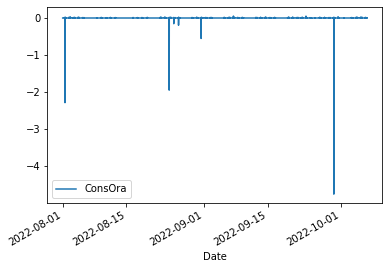

In [33]:
df.plot(x= 'Date', y='ConsOra')
plt.show()

In [34]:
df = df[df['ConsOra']>=0]

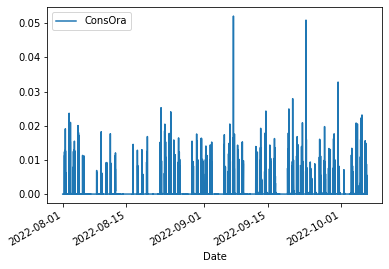

In [35]:
df.plot(x= 'Date', y='ConsOra')
plt.show()

Scartiamo gli eventuali valori nulli che falserebbero la nostra analisi,e visualizziamo 
il DataFrame

In [36]:
df = df.dropna()
df

,Energy,Date,Topic,ConsumoMinuto,ConsOra
54792,129.200,2022-08-01 00:14:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000,0.000000
54791,129.200,2022-08-01 00:19:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000,0.000000
54790,129.200,2022-08-01 00:24:20+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000,0.000000
54789,129.200,2022-08-01 00:29:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000,0.000000
54788,129.200,2022-08-01 00:34:08+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000,0.000000
...,...,...,...,...,...
50728,70.544,2022-10-06 18:39:00+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.002,0.000033
50729,70.546,2022-10-06 18:40:01+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.002,0.000033
50730,70.548,2022-10-06 18:41:24+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.002,0.000033
50731,70.559,2022-10-06 18:42:01+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.011,0.000183


Eseguo il Resample sulla base delle ore, aggrego le colonne di data sommando la colonna del 
consumo, visualizzo per ogni ora del giorno la somma dei consumi

In [37]:
df = df.resample('H', on='Date').agg({'ConsOra': 'sum'}).reset_index()

Visualizzo il DF completo di valori e con le nuove modifiche fatte

In [38]:
df

,Date,ConsOra
0,2022-08-01 00:00:00+02:00,0.000000
1,2022-08-01 01:00:00+02:00,0.000000
2,2022-08-01 02:00:00+02:00,0.000000
3,2022-08-01 03:00:00+02:00,0.000000
4,2022-08-01 04:00:00+02:00,0.000000
...,...,...
1598,2022-10-06 14:00:00+02:00,0.024800
1599,2022-10-06 15:00:00+02:00,0.021067
1600,2022-10-06 16:00:00+02:00,0.014117
1601,2022-10-06 17:00:00+02:00,0.004967


Creo dalla colonna "Date" 2 nuove colonne con giorno della settimana col metodo (dayofweek) e ora del giorno col metodo (hour), in fine
scarto la colonna per semplificare il Data Frame.

In [39]:
df['DoWeek'] = df['Date'].dt.dayofweek
df['Hour'] = df['Date'].dt.hour
df = df.drop(columns=['Date'])

Formatto il mio DF in modo da raggruppare per giorno della settimana e ora, facendo la media dei dati in queste colonne ottenendo il consumo medio di quel giorno della settimana e per quel ora

In [40]:
df = df.groupby(['DoWeek', 'Hour']).mean()

Visualizzo il risultato del procedimento, quindi il nuovo aspetto del mio DF

In [41]:
df

ConsOra
DoWeek Hour          
0      0     0.000312
       1     0.000307
       2     0.000302
       3     0.000307
       4     0.000303
...               ...
6      19    0.000330
       20    0.000337
       21    0.000337
       22    0.000343
       23    0.000346

[168 rows x 1 columns]

Utilizzo il metodo unstack, creo per ogni ora del giorno la sua relativa colonna di consumi

In [42]:
df = df.unstack()

Scarto la riga del titolo della colonna 'ConsHour' del mio DF mantenendo solo le altre righe

In [43]:
df.columns = df.columns.droplevel(0)

Visualizzo di nuovo il mio DF prima della  Hitmap

In [44]:
df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DoWeek,,,,,,,,,,,,,,,,,,,,,
0,0.000312,0.000307,0.000302,0.000307,0.000303,0.000312,0.000307,0.001765,0.019998,0.020982,...,0.016825,0.012338,0.014735,0.004240,0.001975,0.001268,0.000582,0.000347,0.000343,0.000353
1,0.000345,0.000355,0.000345,0.000352,0.000347,0.000343,0.000353,0.006875,0.011440,0.024937,...,0.013362,0.017862,0.015378,0.006423,0.002002,0.000927,0.000462,0.000347,0.000347,0.000357
2,0.000353,0.000348,0.000345,0.000347,0.000340,0.000350,0.000353,0.010958,0.008107,0.021953,...,0.017893,0.010435,0.019962,0.010677,0.001778,0.001103,0.000547,0.000355,0.000350,0.000350
3,0.000353,0.000352,0.000348,0.000348,0.000347,0.000347,0.000357,0.007193,0.011482,0.026478,...,0.017393,0.018418,0.007108,0.003575,0.001458,0.001157,0.000394,0.000359,0.000357,0.000354
4,0.000354,0.000350,0.000346,0.000346,0.000346,0.000354,0.000350,0.006276,0.011109,0.026020,...,0.015454,0.013811,0.011507,0.003204,0.001535,0.000787,0.000341,0.000357,0.000352,0.000350
5,0.000354,0.000350,0.000350,0.000352,0.000343,0.000346,0.000350,0.002698,0.000880,0.000891,...,0.000878,0.001794,0.002946,0.001230,0.001109,0.000822,0.000350,0.000341,0.000344,0.000343
6,0.000350,0.000352,0.000343,0.000346,0.000344,0.000352,0.000350,0.002096,0.001591,0.001406,...,0.000343,0.000335,0.000339,0.000337,0.000328,0.000330,0.000337,0.000337,0.000343,0.000346


Con Seaborn stampo la hitmap considerando sul asse x le ore del giorno e sul asse y il giorno 
della settimana, in colorazione crescente per consumo nel ora del giorno considerata

<AxesSubplot:xlabel='Hour', ylabel='DoWeek'>

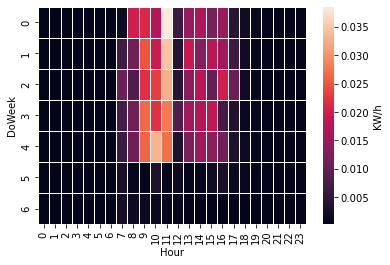

In [52]:
sns.heatmap(df, cbar_kws={'label':'KW/h'}, linewidths=.5)